### Deep Learning Based Results

In [1]:

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional
from bs4 import BeautifulSoup
from tensorflow import keras
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
n_samples = 100


In [2]:
!pip install clean-text

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("preprocessed_tweets.csv").drop(["index"],axis=1)
df["Preprocessed_tweets"] = df["Preprocessed_tweets"].apply(lambda x : str(x))

In [5]:
df

,Tweet,Type,Preprocessed_tweets
0,It's the everything else that's complicated. #...,0,everything else complicated pesummit
1,Eren sent a glare towards Mikasa then nodded a...,0,eren sent glare towards mikasa nodded stood go...
2,I posted a new photo to Facebook http://fb.me/...,0,posted new photo facebook
3,#jan Idiot Chelsea Handler Diagnoses Trump Wit...,1,jan idiot chelsea handler diagnoses trump disease
4,Pedophile Anthony Weiner is TERRIFIED of Getti...,1,pedophile anthony weiner terrified getting bea...
...,...,...,...
11782,11:11 meet harry,0,meet harry
11783,If BBC Food disappears the loss of knowledge w...,0,bbc food disappears loss knowledge catastrophic
11784,Look What Liberals Did to This Historic Monume...,1,look liberals historic monument arizona
11785,"I uploaded a new track, ""Everyday Lite 1"", on ...",0,uploaded new track everyday lite spreaker lite...


In [6]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df["Tweet"], df["Type"], test_size=0.1, random_state=42)

In [7]:
df_test,df_train= train_test_split(df, test_size=0.2, random_state=42)

In [8]:
df_train.values

array([["Espargaro: Ducati have the upper hand: Monster Tech 3 Yamaha's Pol Espargaro says Ducati's outright speed at ... http://bit.ly/1OBKNl3",
        0,
        'espargaro ducati upper hand monster tech yamaha pol espargaro says ducati outright speed'],
       ['3 teens from Brooklyn charged in raping of woman, 33', 1,
        'teens brooklyn charged raping woman'],
       ['Everything is finished and ready to go. Now to pack!#colordashfabric https://www.instagram.com/p/BFg0ZkYIz_s/',
        0, 'everything finished ready go pack colordashfabric'],
       ...,
       ['Trump transition team is a mess. No surprise there.  https://t.co/tRz92ktc9i',
        1, 'trump transition team mess surprise'],
       ['Ted Cruzs evangelical problem #GOPDebate #StopTheGOP', 1,
        'ted cruzs evangelical problem gopdebate stopthegop'],
       ["The mainstream media doesn't hold Hillary accountable for her deliberate destruction of her emails. The American people will. https://t.co/Qcf6anqXfS",

In [9]:
# Calculate the proportions of each category
category_proportions = df_test['Type'].value_counts(normalize=True)

# Calculate the number of samples to select from each category

samples_per_category = (category_proportions * n_samples).round().astype(int)

# Perform stratified sampling
data = df_test.groupby('Type').apply(lambda x: x.sample(samples_per_category[x.name]))

# Reset the index of the resulting DataFrame
data.reset_index(drop=True, inplace=True)

data.head(5)

,Tweet,Type,Preprocessed_tweets
0,"Ricky- aka zesty, we go way back to the old da...",0,ricky aka zesty go way back old days also prog...
1,@Cher bad news fr #CDAIslamabad plz come in ac...,0,cher bad news fr cdaislamabad plz come action ...
2,IS THAT KIHYUN AND HYUNGWON,0,kihyun hyungwon
3,It's just certain shit you don't let slide and...,0,certain shit let slide mfs need get checked re...
4,"My mama know I don't like her husband , idk wh...",0,mama know like husband idk got damn car take home


In [10]:
from tqdm import tqdm
import time 

In [11]:
d = {1:"Spam",0:"Not Spam"}
data["Ground Truth"]  = data["Type"]
data["Type"] = data["Type"].apply(lambda x : d[x])

In [12]:
def output_extraction(x):
    if "Not Spam" in x :
        return 0
    else:
        return 1

In [13]:
from helper_module import *
import pickle
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df["Preprocessed_tweets"],df["Type"], test_size=0.2, random_state=None)

preprocessed_text = X_train.values
tokenizer = Tokenizer(char_level=False, oov_token = "oov") 
tokenizer.fit_on_texts(preprocessed_text)

In [14]:
X_train

10006    congress corrupt engineering coup using taxpay...
6924     chase ends multi vehicle crash dan ryan expres...
4961        bet primary browser internet explorer netscape
4132      checked western union mplusplaces download today
2436     tropical storm hermine approaches florida hawa...
                               ...                        
3086     congratulations mathesonmichael election msp f...
6280     topnews three indicted black man death georgia...
7824     way better believe voter suppression works nor...
8588                   complete ios developer course weeks
1345                 adapting innovation usta winning play
Name: Preprocessed_tweets, Length: 9429, dtype: object

In [15]:
df.columns

Index(['Tweet', 'Type', 'Preprocessed_tweets'], dtype='object')

# ##LSTM

4/4 [==============================] - 1s 14ms/step
              precision    recall  f1-score   support

    Non Spam       0.65      0.63      0.64        51
        Spam       0.63      0.65      0.64        49

    accuracy                           0.64       100
   macro avg       0.64      0.64      0.64       100
weighted avg       0.64      0.64      0.64       100



<Figure size 500x500 with 0 Axes>

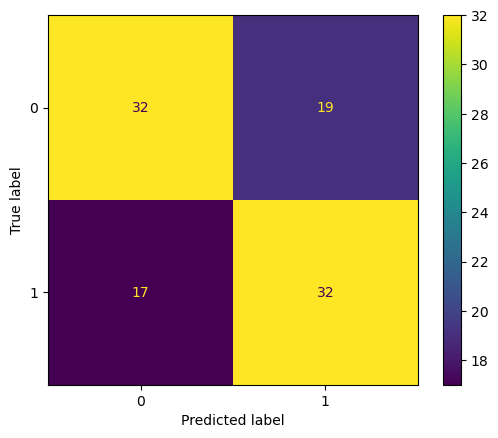

In [16]:
target_names = ["Non Spam","Spam"]
model = keras.models.load_model('lstm1.h5')
preprocessed_text = data["Preprocessed_tweets"].values

vocab_size = 18956

max_len = 20

token_sent = tokenizer.texts_to_sequences(preprocessed_text)
seq = pad_sequences (token_sent, maxlen = 20, padding = "pre", truncating = "post"  )
c = model.predict(seq)

data["Lstm-predicted"] = np.where(c>0.5,1,0)

print(classification_report(data["Ground Truth"].values, data["Lstm-predicted"].values, target_names=target_names))


plt.figure(figsize=(5,5))
cm = confusion_matrix(data["Ground Truth"].values, data["Lstm-predicted"].values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

             

In [17]:
seq

array([[    0,     0,     0, ...,     1,  2326, 16733],
       [    0,     0,     0, ...,   730,  2769,  5070],
       [    0,     0,     0, ...,     0, 14691,  1391],
       ...,
       [    0,     0,     0, ...,  1059,   125,     3],
       [    0,     0,     0, ...,    80,  3036,   596],
       [    0,     0,     0, ...,  8415,    20,     3]])

4/4 [==============================] - 1s 33ms/step
              precision    recall  f1-score   support

    Non Spam       0.64      0.63      0.63        51
        Spam       0.62      0.63      0.63        49

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



<Figure size 500x500 with 0 Axes>

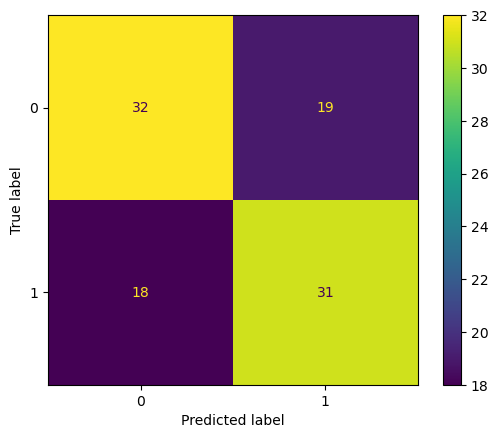

In [18]:

model = keras.models.load_model('lstm2.h5')
preprocessed_text = data["Preprocessed_tweets"].values

vocab_size = len(tokenizer.word_index)+1

max_len = 20

token_sent = tokenizer.texts_to_sequences(preprocessed_text)
seq = pad_sequences (token_sent, maxlen = 20, padding = "pre", truncating = "post"  )
c = model.predict(seq)

data["Lstm-predicted"] = np.where(c>0.5,1,0)

print(classification_report(data["Ground Truth"].values, data["Lstm-predicted"].values, target_names=target_names))


plt.figure(figsize=(5,5))
cm = confusion_matrix(data["Ground Truth"].values, data["Lstm-predicted"].values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

             

### BI LSTM

4/4 [==============================] - 2s 22ms/step
              precision    recall  f1-score   support

    Non Spam       0.61      0.59      0.60        51
        Spam       0.59      0.61      0.60        49

    accuracy                           0.60       100
   macro avg       0.60      0.60      0.60       100
weighted avg       0.60      0.60      0.60       100



<Figure size 500x500 with 0 Axes>

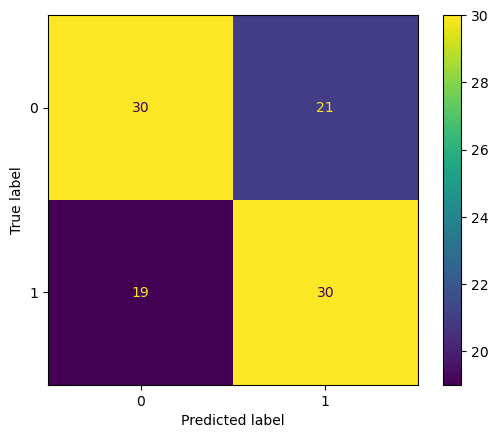

In [19]:
model = keras.models.load_model('bi-lstm1.h5')
preprocessed_text = data["Preprocessed_tweets"].values

vocab_size = len(tokenizer.word_index)+1

max_len = 20

token_sent = tokenizer.texts_to_sequences(preprocessed_text)
seq = pad_sequences (token_sent, maxlen = 20, padding = "pre", truncating = "post"  )
c = model.predict(seq)

data["Bi-Lstm-predicted"] = np.where(c>0.5,1,0)

print(classification_report(data["Ground Truth"].values, data["Bi-Lstm-predicted"].values, target_names=target_names))

plt.figure(figsize=(5,5))
cm = confusion_matrix(data["Ground Truth"].values, data["Bi-Lstm-predicted"].values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

             

4/4 [==============================] - 2s 73ms/step
              precision    recall  f1-score   support

    Non Spam       0.58      0.55      0.57        51
        Spam       0.56      0.59      0.57        49

    accuracy                           0.57       100
   macro avg       0.57      0.57      0.57       100
weighted avg       0.57      0.57      0.57       100



<Figure size 500x500 with 0 Axes>

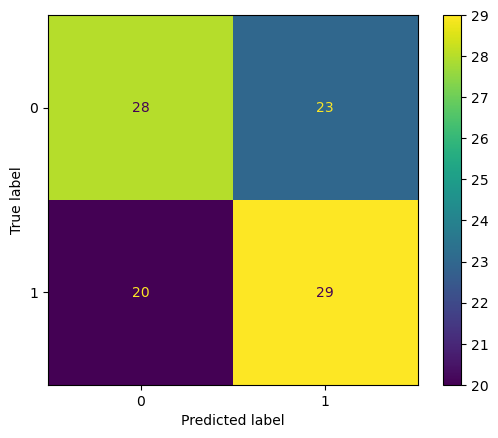

In [20]:
model = keras.models.load_model('bi-lstm2.h5')
preprocessed_text = data["Preprocessed_tweets"].values

vocab_size = len(tokenizer.word_index)+1

max_len = 20

token_sent = tokenizer.texts_to_sequences(preprocessed_text)
seq = pad_sequences (token_sent, maxlen = 20, padding = "pre", truncating = "post"  )
c = model.predict(seq)

data["Bi-Lstm-predicted"] = np.where(c>0.5,1,0)

print(classification_report(data["Ground Truth"].values, data["Bi-Lstm-predicted"].values, target_names=target_names))

plt.figure(figsize=(5,5))
cm = confusion_matrix(data["Ground Truth"].values, data["Bi-Lstm-predicted"].values)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

             